## Predicting House Prices: An End-to-End Regression Modelling Workflow

### Q1  Load dataset and inspect first rows (EDA start)

In [1]:
# Question: Load House Price India.csv, print shape and first 5 rows.


import os, json, warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
from IPython.display import display

DATA_PATH = "House Price India.csv"  # change path if necessary
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"
df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
print("Shape:", df.shape)
display(df.head())


Shape: (14620, 23)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


### Q2 Auto-detect the target column

In [2]:
# Question: Auto-detect likely target (price-like) column; print it.


def detect_target(df):
    for c in df.columns:
        if c.lower() in ("saleprice","sale_price","sale price","price","salepriceinr","target","label","amount","sale_amt"):
            return c
    for c in df.columns:
        if any(k in c.lower() for k in ("price","amount","sale","cost")):
            return c
    num = df.select_dtypes(include=[np.number])
    num = num[[c for c in num.columns if "id" not in c.lower()]]
    return num.var().sort_values(ascending=False).index[0]

target_col = detect_target(df)
print("Detected target column:", target_col)


Detected target column: Price


### Q3  Basic EDA: dtypes, missing values, numeric summary

In [3]:
# Question: Show dtypes, missing counts, and numeric descriptive statistics.

print("Data types:")
display(df.dtypes.to_frame("dtype"))
print("\nMissing values (top 20):")
display(df.isnull().sum().sort_values(ascending=False).head(20).to_frame("missing_count"))
print("\nNumeric summary:")
display(df.select_dtypes(include=[np.number]).describe().T)


Data types:


,dtype
id,int64
Date,int64
number of bedrooms,int64
number of bathrooms,float64
living area,int64
lot area,int64
number of floors,float64
waterfront present,int64
number of views,int64
condition of the house,int64



Missing values (top 20):


,missing_count
id,0
Date,0
number of bedrooms,0
number of bathrooms,0
living area,0
lot area,0
number of floors,0
waterfront present,0
number of views,0
condition of the house,0



Numeric summary:


,count,mean,std,min,25%,50%,75%,max
id,14620.0,6.762821e+09,6237.574799,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14620.0,4.260454e+04,67.347991,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14620.0,3.379343e+00,0.938719,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14620.0,2.129583e+00,0.769934,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14620.0,2.098263e+03,928.275721,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14620.0,1.509328e+04,37919.621304,5.200000e+02,5.010750e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14620.0,1.502360e+00,0.540239,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14620.0,7.660739e-03,0.087193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14620.0,2.331053e-01,0.766259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14620.0,3.430506e+00,0.664151,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Q4 Quick cleaning

In [4]:
# Question: Drop pure-ID columns and normalize string categories.

# Drop ID-like columns (unique per row)
id_cols = [c for c in df.columns if ("id" in c.lower() and df[c].nunique() == len(df))]
if id_cols:
    df = df.drop(columns=id_cols)
    print("Dropped ID columns:", id_cols)
# Normalize categorical text
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip().replace({'nan': pd.NA})
print("Cleaning complete. New shape:", df.shape)


Dropped ID columns: ['id']
Cleaning complete. New shape: (14620, 22)


### Q5 Train-test split

In [5]:
# Question: Split into train/test (80/20) and print shapes.

# Cell 5
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target_col])
y = df[target_col].astype(float)
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (11696, 21) Test: (2924, 21)


### Q6 Baselines: mean, median, and group-wise 

In [6]:
# Question: Compute mean and median baselines and group-wise average baseline if a suitable categorical exists

import numpy as np
def eval_baseline(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_true, y_pred); rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred); r2 = r2_score(y_true, y_pred)
    return {"mse":mse, "rmse":rmse, "mae":mae, "r2":r2}

baseline_results = {}
mean_pred = np.repeat(y_train.mean(), len(y_test))
median_pred = np.repeat(y_train.median(), len(y_test))
baseline_results['mean'] = eval_baseline(y_test, mean_pred)
baseline_results['median'] = eval_baseline(y_test, median_pred)

# Group-wise baseline (look for location/bedroom-like categorical)
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
group_col = None
preferred = ['neighbour','neighborhood','location','city','area','region','locality','bedroom','bedrooms']
for name in preferred:
    for c in cat_cols:
        if name in c.lower().replace(" ", "_"):
            group_col = c; break
    if group_col: break
if group_col is None and cat_cols:
    # fallback: choose categorical with <50 unique values and most non-null
    short = [c for c in cat_cols if X_train[c].nunique() < 50 and X_train[c].notnull().sum()>0]
    if short:
        group_col = sorted(short, key=lambda c: X_train[c].notnull().sum(), reverse=True)[0]

if group_col:
    grp_mean = y_train.groupby(X_train[group_col]).mean()
    grp_pred = X_test[group_col].map(grp_mean).fillna(y_train.mean()).values
    baseline_results[f'group_mean_by_{group_col}'] = eval_baseline(y_test, grp_pred)
    print("Group-wise baseline used on:", group_col)
else:
    print("No suitable column for group-wise baseline.")

import pandas as pd
display(pd.DataFrame(baseline_results).T)


No suitable column for group-wise baseline.


,mse,rmse,mae,r2
mean,1.409519e+11,375435.649277,237863.704801,-0.000234
median,1.496661e+11,386867.038260,226052.410739,-0.062072


### Q7 Preprocessing pipeline

In [14]:

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

print("scikit-learn version:", sklearn.__version__)

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric features:", len(numeric_features), "Categorical features:", len(categorical_features))

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

low_cardinality = [c for c in categorical_features if X_train[c].nunique() <= 15]

# Create OneHotEncoder in a version-compatible way
try:
    # sklearn >= 1.2
    onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    # older sklearn versions
    onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', onehot)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, low_cardinality)
    ],
    remainder='drop'
)
print("Preprocessor ready. Low-cardinality categorical used for one-hot:", low_cardinality)



scikit-learn version: 1.6.1
Numeric features: 21 Categorical features: 0
Preprocessor ready. Low-cardinality categorical used for one-hot: []


### Q8 Simple Linear Regression (SLR) using the strongest single predictor

In [16]:
# Question: Pick the numeric feature with highest absolute correlation with target, train SLR, evaluate.

# find best single numeric predictor
corrs = {}
for c in numeric_features:
    valid = X_train[c].notnull() & y_train.notnull()
    if valid.sum() > 10:
        corrs[c] = abs(np.corrcoef(X_train.loc[valid, c].astype(float), y_train.loc[valid].astype(float))[0,1])
best_single = max(corrs, key=corrs.get) if corrs else (numeric_features[0] if numeric_features else X_train.columns[0])
print("Best single predictor:", best_single)

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
slr_pipeline = Pipeline([('pre', ColumnTransformer([('num', numeric_transformer, [best_single])], remainder='drop')),
                         ('lr', LinearRegression())])
slr_pipeline.fit(X_train, y_train)
y_pred_slr = slr_pipeline.predict(X_test)

# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred); rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred); r2 = r2_score(y_true, y_pred)
    denom = np.where(np.array(y_true)==0, np.nan, np.array(y_true))
    mape = np.nanmean(np.abs((np.array(y_true)-np.array(y_pred))/denom))*100
    return {"mse":mse, "rmse":rmse, "mae":mae, "r2":r2, "mape":mape}

slr_metrics = evaluate(y_test, y_pred_slr)
print("SLR metrics:", slr_metrics)


Best single predictor: living area
SLR metrics: {'mse': 67195530565.53933, 'rmse': np.float64(259221.0071841002), 'mae': 172726.51822970863, 'r2': 0.5231618571679191, 'mape': np.float64(35.399442484800296)}


### Q9 Multiple Linear Regression (MLR) with all preprocessed features

In [17]:
# Question: Train MLR (OLS) using the full preprocessor and evaluate


mlr_pipeline = Pipeline([('pre', preprocessor), ('lr', LinearRegression())])
mlr_pipeline.fit(X_train, y_train)
y_pred_mlr = mlr_pipeline.predict(X_test)
mlr_metrics = evaluate(y_test, y_pred_mlr)
print("MLR metrics:", mlr_metrics)


MLR metrics: {'mse': 39631135219.66499, 'rmse': np.float64(199075.7022332585), 'mae': 124782.64788148865, 'r2': 0.7187664602478245, 'mape': np.float64(24.859770658172735)}


### Q10 Diagnose multicollinearity using VIF

In [19]:
# Question: Compute VIF for numeric predictors (after median imputation).


from statsmodels.stats.outliers_influence import variance_inflation_factor
if len(numeric_features) > 0:
    num_imputed = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_train[numeric_features]), columns=numeric_features)
    if num_imputed.shape[1] > 1:
        vif_vals = [variance_inflation_factor(num_imputed.values, i) for i in range(num_imputed.shape[1])]
    else:
        vif_vals = [np.nan]
    vif_df = pd.DataFrame({'feature': num_imputed.columns, 'VIF': vif_vals}).sort_values('VIF', ascending=False)
    display(vif_df)
else:
    print("No numeric features to compute VIF.")


,feature,VIF
3,living area,inf
10,Area of the house(excluding basement),inf
11,Area of the basement,inf
14,Postal Code,1.545490e+06
16,Longitude,1.004999e+06
0,Date,3.972976e+05
15,Lattitude,1.597277e+05
12,Built Year,1.061679e+04
9,grade of the house,1.519571e+02
20,Distance from the airport,5.425467e+01


### Q11 Regularization: RidgeCV, LassoCV, ElasticNetCV

In [20]:
# Question: Train Ridge, Lasso, ElasticNet with CV (use moderate grids); evaluate on test set.

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

alphas = np.logspace(-3, 3, 15)

# RidgeCV
ridge_cv = Pipeline([('pre', preprocessor), ('ridge', RidgeCV(alphas=alphas, scoring='neg_root_mean_squared_error', cv=3))])
print("Training Ridge...")
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
ridge_metrics = evaluate(y_test, y_pred_ridge)
print("Ridge metrics:", ridge_metrics, "alpha:", ridge_cv.named_steps['ridge'].alpha_)

# LassoCV
lasso_cv = Pipeline([('pre', preprocessor), ('lasso', LassoCV(cv=3, max_iter=3000, n_alphas=30, random_state=RANDOM_STATE))])
print("Training Lasso...")
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
lasso_metrics = evaluate(y_test, y_pred_lasso)
print("Lasso metrics:", lasso_metrics, "alpha:", lasso_cv.named_steps['lasso'].alpha_)

# ElasticNetCV
en_cv = Pipeline([('pre', preprocessor), ('en', ElasticNetCV(cv=3, l1_ratio=[.1,.5,.9], max_iter=3000, n_alphas=30, random_state=RANDOM_STATE))])
print("Training ElasticNet...")
en_cv.fit(X_train, y_train)
y_pred_en = en_cv.predict(X_test)
en_metrics = evaluate(y_test, y_pred_en)
print("ElasticNet metrics:", en_metrics, "alpha,l1_ratio:", en_cv.named_steps['en'].alpha_, en_cv.named_steps['en'].l1_ratio_)


Training Ridge...
Ridge metrics: {'mse': 39629457823.94021, 'rmse': np.float64(199071.4892292219), 'mae': 124635.91544992392, 'r2': 0.718778363513644, 'mape': np.float64(24.806334419998933)} alpha: 51.794746792312125
Training Lasso...
Lasso metrics: {'mse': 39583740069.4142, 'rmse': np.float64(198956.62861391224), 'mae': 124245.43649576943, 'r2': 0.7191027893940434, 'mape': np.float64(24.681326929652997)} alpha: 852.9150918417243
Training ElasticNet...
ElasticNet metrics: {'mse': 120162232298.07295, 'rmse': np.float64(346644.2445765874), 'mae': 215567.5597957037, 'r2': 0.14729543460208983, 'mape': np.float64(47.821630997412754)} alpha,l1_ratio: 288.0195120700673 0.9


### Q12 Cross-validation strategies (K-Fold and conditional LOOCV)

In [21]:
# Question: Run K-Fold CV (5-fold or 3-fold if speed necessary). Run LOOCV only if small training set.


from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
models_for_cv = {'MLR': mlr_pipeline, 'Ridge': ridge_cv, 'Lasso': lasso_cv, 'ElasticNet': en_cv}
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_summary = {}
import time
for name, model in models_for_cv.items():
    try:
        start = time.time()
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
        cv_summary[name] = {"KFold5_RMSE_mean": float(-scores.mean()), "KFold5_RMSE_std": float(scores.std())}
        print(f"{name} CV done in {time.time()-start:.1f}s")
    except Exception as e:
        cv_summary[name] = {"error": str(e)}
# LOOCV if small
if X_train.shape[0] <= 200:
    loo = LeaveOneOut()
    for name, model in models_for_cv.items():
        s = cross_val_score(model, X_train, y_train, cv=loo, scoring='neg_root_mean_squared_error')
        cv_summary[name]['LOOCV_RMSE_mean'] = float(-s.mean())

import pandas as pd
display(pd.DataFrame(cv_summary).T)


MLR CV done in 5.4s
Ridge CV done in 4.7s
Lasso CV done in 0.5s
ElasticNet CV done in 0.5s


,KFold5_RMSE_mean,KFold5_RMSE_std
MLR,201703.628463,11306.037640
Ridge,201669.196941,11378.585395
Lasso,201670.045788,11470.389836
ElasticNet,337881.698096,14926.480564


### Q13  Leaderboard and Champion model selection

In [24]:
# Question: Compare test RMSE for mean/median/SLR/MLR/Ridge/Lasso/ElasticNet and pick the champion.

leaderboard = {
    'mean_baseline': baseline_results['mean']['rmse'],
    'median_baseline': baseline_results['median']['rmse'],
    f'SLR_{best_single}': slr_metrics['rmse'],
    'MLR': mlr_metrics['rmse'],
    'Ridge': ridge_metrics['rmse'],
    'Lasso': lasso_metrics['rmse'],
    'ElasticNet': en_metrics['rmse']
}
leader_df = pd.Series(leaderboard).sort_values().to_frame("test_RMSE")
display(leader_df)
champion_name = leader_df.index[0]
print("Champion model:", champion_name)

# Map to the pipeline object
if champion_name.startswith('SLR_'):
    champion_pipeline = slr_pipeline
elif champion_name == 'MLR':
    champion_pipeline = mlr_pipeline
elif champion_name == 'Ridge':
    champion_pipeline = ridge_cv
elif champion_name == 'Lasso':
    champion_pipeline = lasso_cv
elif champion_name == 'ElasticNet':
    champion_pipeline = en_cv
else:
    champion_pipeline = mlr_pipeline


,test_RMSE
Lasso,198956.628614
Ridge,199071.489229
MLR,199075.702233
SLR_living area,259221.007184
ElasticNet,346644.244577
mean_baseline,375435.649277
median_baseline,386867.038260


Champion model: Lasso


### Q14 Save champion model, predictions, and metrics

In [27]:
# Question: Export champion_model.joblib, houseprice_predictions_test.csv, and test_metrics.json to ./outputs (or change folder).


import joblib, os, json
OUTPUT_DIR = "./outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save model
model_path = os.path.join(OUTPUT_DIR, "champion_model.joblib")
joblib.dump(champion_pipeline, model_path)

# Predictions on test set
champ_preds = champion_pipeline.predict(X_test)
pred_df = X_test.copy()
pred_df[target_col + "_pred"] = champ_preds
pred_df[target_col + "_true"] = y_test.values
pred_csv = os.path.join(OUTPUT_DIR, "houseprice_predictions_test.csv")
pred_df.reset_index(drop=True).to_csv(pred_csv, index=False)

# Metrics
test_metrics = evaluate(y_test, champ_preds)
test_metrics['model_name'] = champion_name
metrics_path = os.path.join(OUTPUT_DIR, "test_metrics.json")
with open(metrics_path, "w") as f:
    json.dump(test_metrics, f, indent=2)

print("Saved artifacts to", OUTPUT_DIR)
print("-", os.path.basename(model_path))
print("-", os.path.basename(pred_csv))
print("-", os.path.basename(metrics_path))


Saved artifacts to ./outputs
- champion_model.joblib
- houseprice_predictions_test.csv
- test_metrics.json


### Q15  Residual analysis & diagnostics

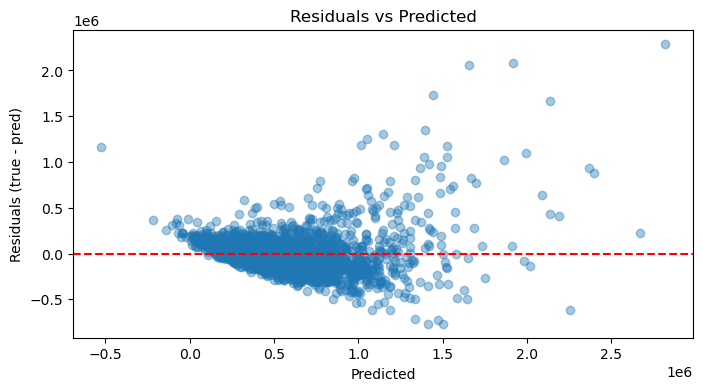

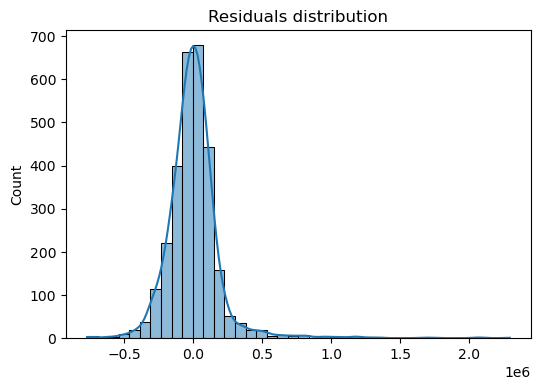

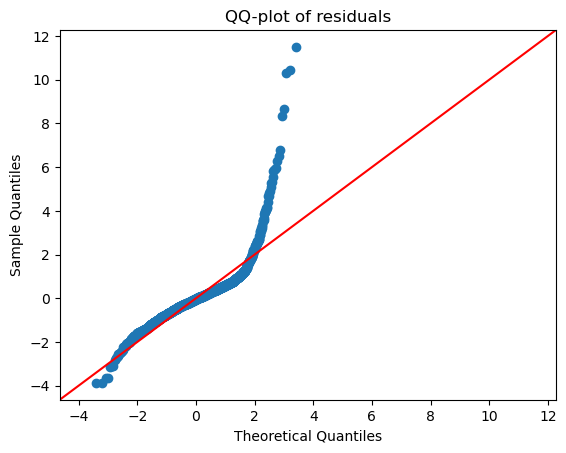

In [30]:
# Question: Plot residual scatter, histogram, and QQ-plot.


import matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm
residuals = y_test.values - champ_preds

plt.figure(figsize=(8,4))
plt.scatter(champ_preds, residuals, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals (true - pred)")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals distribution")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-plot of residuals")
plt.show()


### Q16 Coefficients and feature importance for linear champions

In [31]:
# Question: If the champion is linear, extract coefficients and map to feature names post-preprocessing.


import numpy as np, pandas as pd
try:
    last_step_name = list(champion_pipeline.named_steps.keys())[-1]
    model_obj = champion_pipeline.named_steps[last_step_name]
    coefs = getattr(model_obj, "coef_", None)
    if coefs is None:
        print("Champion model has no coef_ attribute (not linear).")
    else:
        # get feature names from preprocessor (sklearn >=1.0)
        pre = champion_pipeline.named_steps.get('pre') or champion_pipeline.named_steps.get('preprocessor')
        feat_names = []
        try:
            feat_names = list(pre.get_feature_names_out())
        except Exception:
            # fallback construct: numeric names + onehot names if possible
            feat_names = numeric_features[:]
            if low_cardinality:
                try:
                    ohe = pre.named_transformers_['cat'].named_steps['onehot']
                    feat_names += list(ohe.get_feature_names_out(low_cardinality))
                except Exception:
                    pass
        n = min(len(feat_names), len(coefs))
        coef_df = pd.DataFrame({'feature': feat_names[:n], 'coef': coefs[:n]})
        coef_df['abs_coef'] = coef_df['coef'].abs()
        display(coef_df.sort_values('abs_coef', ascending=False).head(30))
except Exception as e:
    print("Could not extract coefficients:", e)


,feature,coef,abs_coef
3,num__living area,139328.557406,139328.557406
9,num__grade of the house,111098.279481,111098.279481
15,num__Lattitude,74540.550695,74540.550695
12,num__Built Year,-71614.785288,71614.785288
6,num__waterfront present,50419.675369,50419.675369
7,num__number of views,34960.973495,34960.973495
10,num__Area of the house(excluding basement),34662.863931,34662.863931
1,num__number of bedrooms,-31688.276395,31688.276395
2,num__number of bathrooms,29812.055680,29812.055680
8,num__condition of the house,20186.276445,20186.276445


### Q17 Short written report

In [34]:
# Question: Save a concise report summarizing baselines, model metrics and champion rationale.

report_lines = []
report_lines.append("House Price Prediction - Short Report")
report_lines.append(f"Dataset: {os.path.basename(DATA_PATH)}")
report_lines.append(f"Target column: {target_col}")
report_lines.append(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
report_lines.append("")
report_lines.append("Baseline results (test RMSE):")
for k,v in baseline_results.items():
    report_lines.append(f"- {k}: RMSE={v['rmse']:.2f}, MAE={v['mae']:.2f}, R2={v['r2']:.4f}")
report_lines.append("")
models_summary = {'SLR': slr_metrics, 'MLR': mlr_metrics, 'Ridge': ridge_metrics, 'Lasso': lasso_metrics, 'ElasticNet': en_metrics}
for name,m in models_summary.items():
    report_lines.append(f"- {name}: RMSE={m['rmse']:.2f}, MAE={m['mae']:.2f}, R2={m['r2']:.4f}, MAPE={m['mape']:.2f}%")
report_lines.append("")
report_lines.append(f"Champion model: {champion_name}")
report_lines.append("Rationale: Selected by lowest test RMSE after CV tuning. Regularized models reduce overfitting and help with multicollinearity.")
report_text = "\n".join(report_lines)

report_path = os.path.join("./outputs", "model_report.txt")
with open(report_path, "w") as f:
    f.write(report_text)
print("Saved report to", report_path)
print(report_text)


Saved report to ./outputs\model_report.txt
House Price Prediction - Short Report
Dataset: House Price India.csv
Target column: Price
Train size: 11696, Test size: 2924

Baseline results (test RMSE):
- mean: RMSE=375435.65, MAE=237863.70, R2=-0.0002
- median: RMSE=386867.04, MAE=226052.41, R2=-0.0621

- SLR: RMSE=259221.01, MAE=172726.52, R2=0.5232, MAPE=35.40%
- MLR: RMSE=199075.70, MAE=124782.65, R2=0.7188, MAPE=24.86%
- Ridge: RMSE=199071.49, MAE=124635.92, R2=0.7188, MAPE=24.81%
- Lasso: RMSE=198956.63, MAE=124245.44, R2=0.7191, MAPE=24.68%
- ElasticNet: RMSE=346644.24, MAE=215567.56, R2=0.1473, MAPE=47.82%

Champion model: Lasso
Rationale: Selected by lowest test RMSE after CV tuning. Regularized models reduce overfitting and help with multicollinearity.
